<a href="https://colab.research.google.com/github/lucca-miorelli/sf_airbnb/blob/main/San_Francisco_Aribnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lise dos Dados do Airbnb - *San Francisco*
*Lucca Miorelli* ([Github](https://github.com/lucca-miorelli/ds_projects), [Linkedin](https://www.linkedin.com/in/lucca-miorelli/))

---

O [Airbnb](https://www.airbnb.com.br/) j√° √© considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe √© que ele **n√£o possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitri√µes que querem alugar seus im√≥veis de maneira pr√°tica, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atr√°s, j√° havia **hospedado mais de 300 milh√µes** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb √© disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), √© poss√≠vel baixar uma grande quantidade de dados para desenvolver projetos e solu√ß√µes de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes √† cidade de San Francisco, e ver quais insights podem ser extra√≠dos a partir de dados brutos.**

In [1]:
!pip install plotly==5.5.0

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 26.5 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Obten√ß√£o dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px

import json
from urllib.request import urlopen

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2021-11-02/visualisations/listings.csv")

# importar arquivo com geolocaliza√ß√£o http://data.insideairbnb.com/united-states/ca/san-francisco/2021-11-02/visualisations/neighbourhoods.geojson
with urlopen('http://data.insideairbnb.com/united-states/ca/san-francisco/2021-11-02/visualisations/neighbourhoods.geojson') as response:
    geo = json.load(response)

In [4]:
df.head()

id  ...                    license
0   958  ...  City Registration Pending
1  5858  ...                        NaN
2  7918  ...                        NaN
3  8142  ...                        NaN
4  8339  ...                STR-0000264

[5 rows x 18 columns]

Cada linha (entrada) do dataframe √© um registro de im√≥vel no Airbnb; cada coluna, por sua vez, √© uma informa√ß√£o que define o im√≥vel (vamos detalhar mais adiante).

A c√©lula acima nos permite ver as 5 primeiras entradas do dataframe. Logo na primeira linha, perceba que a Holly (`host_name`)  tem um im√≥vel registrado no bairro (`neighbourhood`) Western Addition.

Ainda observando o im√≥vel de Holly, o custo de pernoite (`price`) √© de $161. **Ser√° que, para San Francisco, isso √© caro ou barato?**

Vamos buscar as respostas nos pr√≥prios dados!

## An√°lise dos Dados


In [5]:
# informa√ß√µes do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6508 non-null   int64  
 1   name                            6508 non-null   object 
 2   host_id                         6508 non-null   int64  
 3   host_name                       6495 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6508 non-null   object 
 6   latitude                        6508 non-null   float64
 7   longitude                       6508 non-null   float64
 8   room_type                       6508 non-null   object 
 9   price                           6508 non-null   int64  
 10  minimum_nights                  6508 non-null   int64  
 11  number_of_reviews               6508 non-null   int64  
 12  last_review                     51

Perceba que o tipo das colunas s√£o `int64`, `float64` (n√∫mericos inteiros e decimais, respectivamente) e `object`, que s√£o vari√°veis n√£o num√©ricas, normalmente contendo algum tipo de texto.

Para facilitar o entendimento dos pr√≥ximos passos, aqui est√° um **dicion√°rio das vari√°veis** do dataset:

**Dicion√°rio de vari√°veis**

* `id`- n√∫mero identificador, √∫nico de cada im√≥vel.
* `name` - nome do im√≥vel.
* `host_id` - n√∫mero identificador do anfitri√£o na plataforma.
* `host_name`- nome do anfitri√£o.
* `neighbourhood_group`- NaN (sem valores v√°lidos)
* `neighbourhood`- nome do bairro onde o im√≥vel est√° localizado.
* `latitude` - latitude do im√≥vel.
* `longitude`- longidutde do im√≥vel
* `room_type` - tipo de acomoda√ß√£o.
* `price` - pre√ßo da estadia em Euros por noite.
* `minimum_nights`- n√∫mero m√≠nimo de pernoites para loca√ß√£o do im√≥vel.
* `number_of_reviews`- quantidade de reviews no app que o im√≥vel possui.
* `last_review`- data da √∫ltima review realizada.
* `reviews_per_month`- quantidade m√©dia de reviews por m√™s.
* `calculated_host_listings_count`- quantidade de im√≥veis do anfitri√£o.
* `availability_365`- n√∫mero de dias de disponibilidade dentro de 365 dias.


### **Q1. Quantos atributos (vari√°veis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das vari√°veis?**

In [6]:
# identificar a dimens√£o do dataset
print("Entradas:\t {}".format(df.shape[0]))
print("Vari√°veis:\t {}\n".format(df.shape[1]))

# identificar tipo das vari√°veis
df.dtypes

Entradas:	 6508
Vari√°veis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Com o c√≥digo acima, de acordo com o dataset disponibilizado h√° **6.508** im√≥veis registrados na plataforma em San Francisco.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Este √© um passo muito importante para a **An√°lise Explorat√≥ria** dos dados, mas principalmente para a constru√ß√£o de um modelo de **Machine Learning**, onde devemos tratar os valores faltantes de alguma forma - seja ela por imputa√ß√£o ou remo√ß√£o.

Como agora estamos apenas preocupados com a An√°lise Explorat√≥ria dos dados, vamos deixar este tema para a pr√≥xima... Por enquanto, vamos visualizar os dados faltantes.

In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("o dataframe selecionado tem " + str(df.shape[1]) + " colunas.\n"      
            "H√° " + str(mis_val_table_ren_columns.shape[0]) +
              " colunas com valores faltantes.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
data_missing = missing_values_table(df)
data_missing

o dataframe selecionado tem 18 colunas.
H√° 5 colunas com valores faltantes.


Missing Values  % of Total Values
neighbourhood_group            6508              100.0
license                        2718               41.8
last_review                    1378               21.2
reviews_per_month              1378               21.2
host_name                        13                0.2

Text(0.5, 1.0, 'Distribui√ß√£o de valores faltantes no Dataset.')

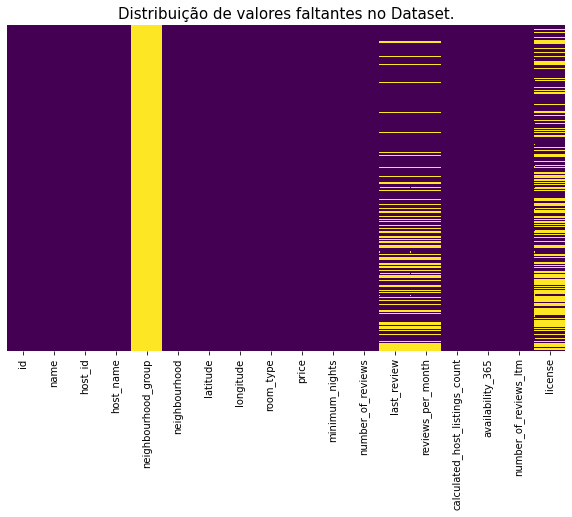

In [8]:
# mostrar visualmente valores faltantes
plt.figure(figsize=(10,6))
ax = sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)
ax.set_title('Distribui√ß√£o de valores faltantes no Dataset.', fontsize=15)


Como podemos pereber, a coluna com 100% dos valores faltantes nem faz sentido ser utilizada. 

A coluna `license` (com 41.8% de valores nulos), assim como `last_review` e `reviews_per_month` (21.2%), cont√©m dados que n√£o ser√£o relevantes para nossa an√°lise neste momento, ent√£o vamos dispensar estas colunas.

J√° a coluna `host_name` cont√©m apenas 0,2% de valores nulos, o que neste caso n√£o representa uma parcela significativa na nossa an√°lise. 

### **Q3. Qual o tipo de distribui√ß√£o das vari√°veis?** 

Este √© um primeiro passo importante para descobrirmos se h√° algum *outlier* presente. Isto √©, valores que fogem muito da distribui√ß√£o (muito baixos ou muito altos).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f477bd103d0>,
      dtype=object)

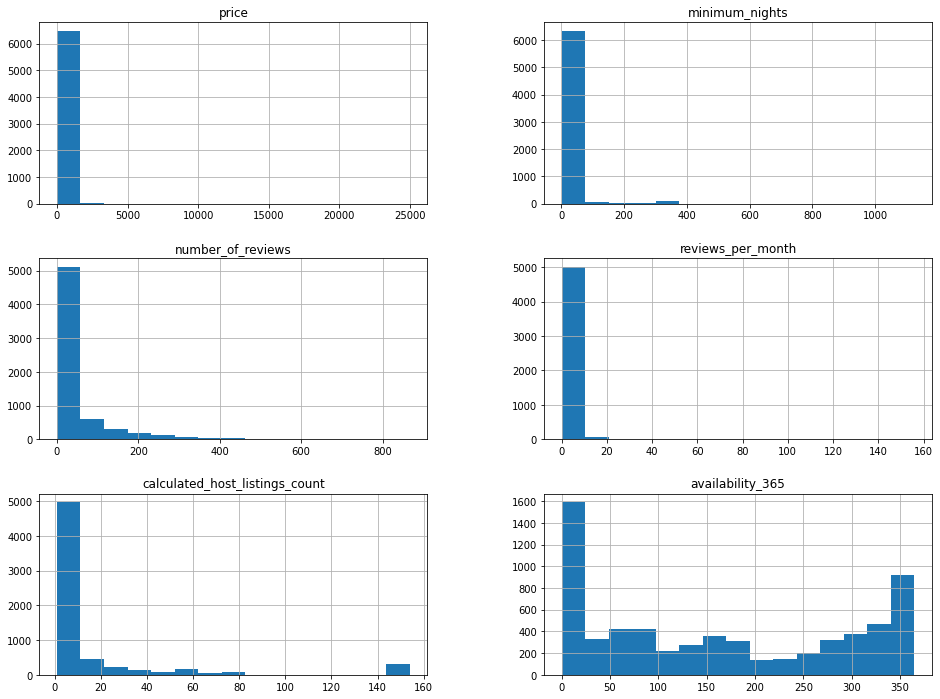

In [9]:
# plotar o histograma das vari√°veis num√©ricas
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
numerical_df = df[numerical_columns]
numerical_df.hist(bins=15, figsize=(16,12))

### **Q4. Qual a m√©dia dos pre√ßos de aluguel?**

In [10]:
# ver a m√©dia da coluna `price``
print(f'O pre√ßo m√©dio de pernoite em San Francisco √©: U$ {df.price.mean():0.2f}')
print(f'A mediana dos pre√ßos de pernoite em San Francisco √©: U$ {df.price.median():0.2f}')

O pre√ßo m√©dio de pernoite em San Francisco √©: U$ 235.65
A mediana dos pre√ßos de pernoite em San Francisco √©: U$ 149.00


Por√©m, h√° alguns pontos de aten√ß√£o, como:
* H√° influ√™ncia expressiva de *outliers* nesse resultado?
* Estamos falando do mesmo tipo de im√≥vel?
* Ser√° que a m√©dia n√£o varia de acordo com os bairros?
  * Imagine o pre√ßo de um im√≥vel com vista para a Golden Gate, ou um im√≥vel dentro de uma das mais famosasa *Chinatown* do mundo!

#### **Q4.1. Tratamento de dados**


Agora, vamos excluir as colunas que n√£o nos interessam na an√°lise e analisar a distribui√ß√£o estat√≠tisca de cada coluna num√©rica.

In [11]:
# buscar por outliers
numerical_columns.remove('reviews_per_month')
df[numerical_columns].describe()

price  ...  availability_365
count   6508.000000  ...       6508.000000
mean     235.649355  ...        161.842348
std      687.026273  ...        134.338598
min        0.000000  ...          0.000000
25%       95.000000  ...         28.000000
50%      149.000000  ...        145.000000
75%      239.000000  ...        303.000000
max    25000.000000  ...        365.000000

[8 rows x 5 columns]

Observa-se que em algumas colunas, h√° outliers evidentes e suspeitos.
* Por exemplo, a coluna `minimum_nights` tem m√©dia de 23.5 mas o m√°ximo valor √© de 1125. Estranho, n√£o? üòñ

Vamos verificar graficamente e realizar trabalhar com os interquartis, fazendo a remo√ß√£o destes outliers:

In [12]:
# remover colunas desnecess√°rias
df.drop(columns=['last_review', 'license', 'neighbourhood_group', 'reviews_per_month'], axis=1, inplace=True)

minimum_nights: valores acima de 30:
389 entradas
5.9773%


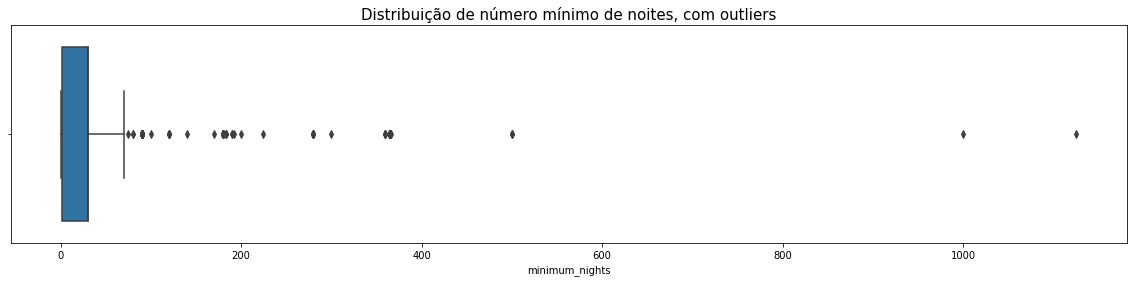

In [13]:
# minimum nights

#fig = go.Figure()
#fig.add_trace(go.Box(x=df.minimum_nights))
#ig.update_layout(title_text = "Distribui√ß√£o de n√∫mero m√≠nimo de noites, com outliers")
#fig.update_yaxes(title_text="minimum_nights")
#fig.show()

plt.figure(figsize=(20,4))
ax = sns.boxplot(x=df["minimum_nights"])
ax.set_title("Distribui√ß√£o de n√∫mero m√≠nimo de noites, com outliers", fontsize=15)

# ver a quantidade de valores acima de 30 dias 
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))




price: valores acima de 1000
93 entradas
1.4290%


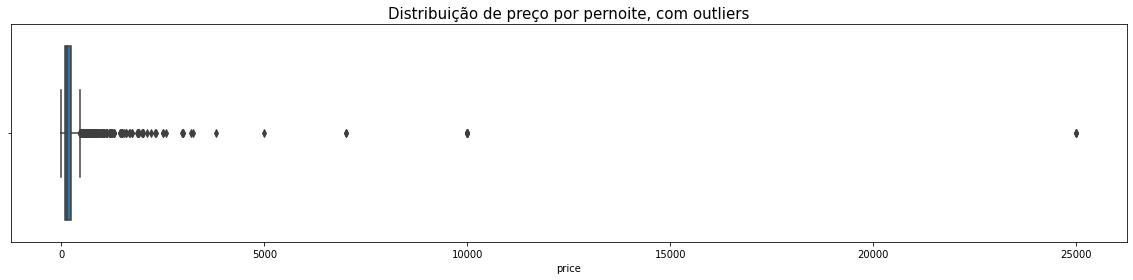

In [14]:
# price

#fig = go.Figure()
#fig.add_trace(go.Box(x=df.price))
#fig.update_layout(title_text = "Distribui√ß√£o de pre√ßo por pernoite, com outliers")
#fig.update_yaxes(title_text="price")
#fig.show()

plt.figure(figsize=(20,4))
ax = sns.boxplot(x=df["price"])
ax.set_title('Distribui√ß√£o de pre√ßo por pernoite, com outliers', fontsize=15)

# quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))


In [15]:
# remover outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
# m√©dia e mediana dos pre√ßos com tratamento de outliers
print(f'A m√©dia de pre√ßo de pernoite em San Francisco, com remo√ß√£o de outliers, √©: U$ {df_clean.price.mean():0.2f}')
print(f'A mediana dos pre√ßos de pernoite em San Francisco, com remo√ß√£o de outliers, √©: {df_clean.price.median():0.2f}')

A m√©dia de pre√ßo de pernoite em San Francisco, com remo√ß√£o de outliers, √©: U$ 167.80
A mediana dos pre√ßos de pernoite em San Francisco, com remo√ß√£o de outliers, √©: 144.50


minimum_nights: valores acima de 30:
181 entradas
5.5864%


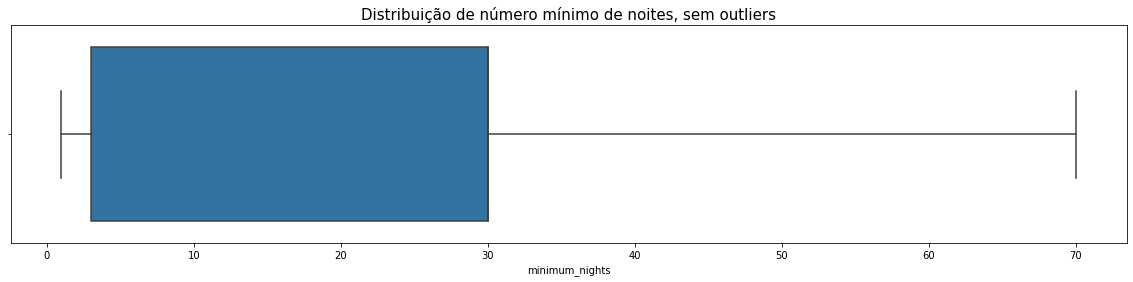

In [17]:
# minimum nights

#fig = go.Figure()
#fig.add_trace(go.Box(x=df_clean.minimum_nights))
#fig.update_layout(title_text = "Distribui√ß√£o de n√∫mero m√≠nimo de noites, sem outliers")
#fig.update_yaxes(title_text="minimum_nights")
#fig.show()

plt.figure(figsize=(20,4))
ax = sns.boxplot(x=df_clean["minimum_nights"])
ax.set_title("Distribui√ß√£o de n√∫mero m√≠nimo de noites, sem outliers", fontsize=15)


# ver a quantidade de valores acima de 30 dias 
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df_clean[df_clean.minimum_nights > 30])))
print("{:.4f}%".format((len(df_clean[df_clean.minimum_nights > 30]) / df_clean.shape[0])*100))


price: valores acima de 1000
0 entradas
0.0000%


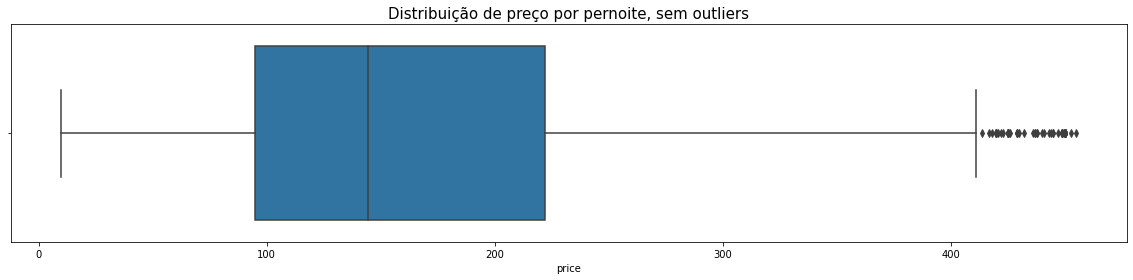

In [18]:
# price
#fig = go.Figure()
#fig.add_trace(go.Box(x=df_clean.price))
#fig.update_layout(title_text = "Distribui√ß√£o de pre√ßo por pernoite, sem outliers")
#fig.update_yaxes(title_text="price")
#fig.show()

plt.figure(figsize=(20,4))
ax = sns.boxplot(x=df_clean["price"])
ax.set_title("Distribui√ß√£o de pre√ßo por pernoite, sem outliers", fontsize=15)

# quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df_clean[df_clean.price > 1000])))
print("{:.4f}%".format((len(df_clean[df_clean.price > 1000]) / df_clean.shape[0])*100))

Com a remo√ß√£o dos outliers, nossa an√°lise ficar√° mais simples. 

#### **Q4.2 Como se comparam os pre√ßos m√©dios de cada regi√£o com o pre√ßo m√©dio da cidade?**

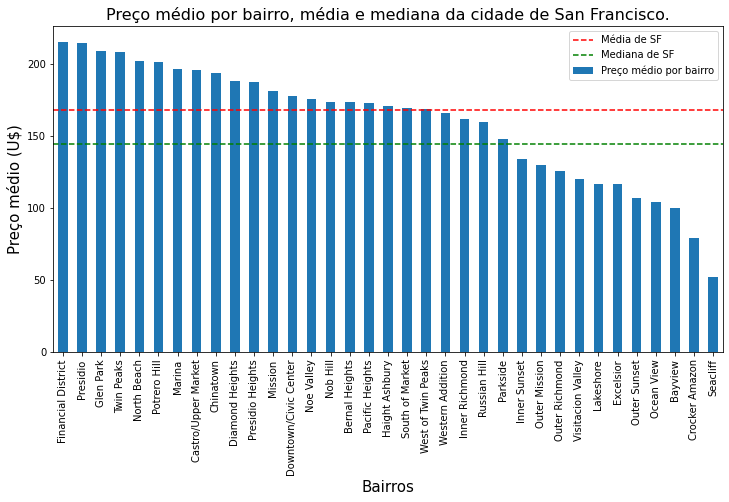

In [19]:
plt.figure(figsize=(12,6))

# barras com pre√ßos m√©dios por bairro
avg_hood = df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)
avg_hood.plot.bar()

#linha com pre√ßo m√©dio da cidade
avg_city = df_clean.price.mean()
plt.axhline(y=avg_city, color='r', linestyle='--')

# linha da mediana de pre√ßos da cidade
median_city = df_clean.price.median()
plt.axhline(y=median_city, color='g', linestyle='--')

# adicionar legendas
plt.legend(loc='best', labels=['M√©dia de SF', 'Mediana de SF', 'Pre√ßo m√©dio por bairro'])
plt.xlabel('Bairros', fontsize=15)
plt.ylabel('Pre√ßo m√©dio (U$)', fontsize=15)
plt.title('Pre√ßo m√©dio por bairro, m√©dia e mediana da cidade de San Francisco.', fontsize=16)

plt.show()

### **Q5. Qual a correla√ß√£o existente entre as vari√°veis?**

O principal objetivo da an√°lise de dados √© **responder perguntas de neg√≥cio**. Neste caso, ser√° que existe rela√ß√£o de `price` com alguma outra vari√°vel?

Vamos analisar se existe rela√ß√£o linear entre as vari√°veis num√©ricas:

#### **Q5.1 Correla√ß√£o com outliers removidos**

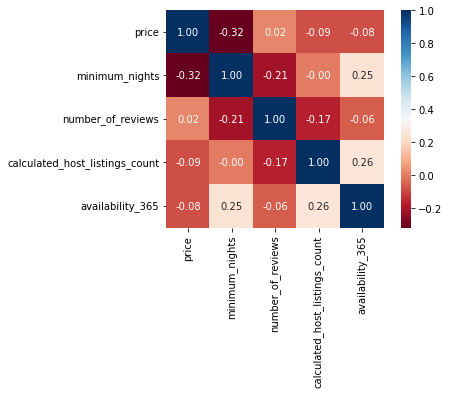

In [20]:
# criar uma matriz de correla√ß√£o
corr = df_clean[numerical_columns].corr()

# mostrar a matriz de correla√ß√£o
sns.heatmap(corr, square = True, annot=True, fmt=".2f", linecolor='white', cmap='RdBu')

#### **Q5.2 Correla√ß√£o sem tratamento dos dados**

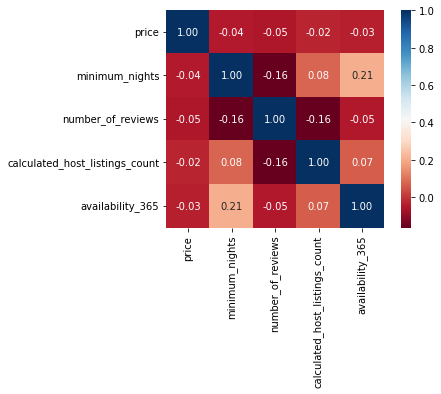

In [21]:
# plotar um heatmap a partir das correla√ß√µes sem tratamento de outliers e ver diferen√ßa
sns.heatmap(df[numerical_columns].corr(), square = True, annot=True, fmt=".2f", linecolor='white', cmap='RdBu')

Deste ponto de vista, **n√£o houve nenhuma rela√ß√£o linear expressiva das vari√°veis com `price`**, pois nenhuma coluna est√° muito longe do zero. Entretanto, percebe-se que os valores variam antes e depois do tratamento de outliers. Por exemplo‚Åâ
* A diferen√ßa da correla√ß√£o linear entre `price`e `minimum_nights` antes e depois do tratamento √© expressiva. Com todos outliers presentes, o **coeficiente de correla√ß√£o linear** foi quase nulo (-0.04), enquanto que para o outro caso houve uma correla√ß√£o linear negativa de -0.32.
* Este segundo caso indica que h√° uma leve correla√ß√£o negativa entre o pre√ßo e o n√∫mero m√≠nimo de noites, ou seja, quanto maior o n√∫mero m√≠nimo de pernoites, menor tende a ser o pre√ßo por di√°ria.
* O que at√© faz sentido: atrai h√≥spedes que querem permanecer por mais tempo e gastar menos, e  garante que o im√≥vel n√£o fique desocupado.

### **Q6. Qual o tipo de im√≥vel mais alugado no Airbnb?**

In [22]:
# mostrar a porcentagem de cada tipo de im√≥vel dispon√≠vel
type_percentage = df_clean.room_type.value_counts() / df_clean.shape[0]

fig = go.Figure(data=[go.Pie(labels=df_clean.room_type.unique(), values=type_percentage, hole=.5)])
fig.show()

#### **Q6.1 Comparando os pre√ßos de acordo com o tipo de im√≥vel.**

In [23]:
# agrupando dados por neighbourhood e room_type
avg_hood_type = pd.DataFrame(df_clean.groupby(by=['neighbourhood', 'room_type']).price.mean())
avg_hood_type

price
neighbourhood      room_type                  
Bayview            Entire home/apt  154.365854
                   Private room      71.455696
                   Shared room      100.000000
Bernal Heights     Entire home/apt  196.623188
                   Private room      96.952381
...                                        ...
West of Twin Peaks Private room      91.260870
Western Addition   Entire home/apt  183.202186
                   Hotel room       316.333333
                   Private room     132.494624
                   Shared room       54.400000

[86 rows x 1 columns]

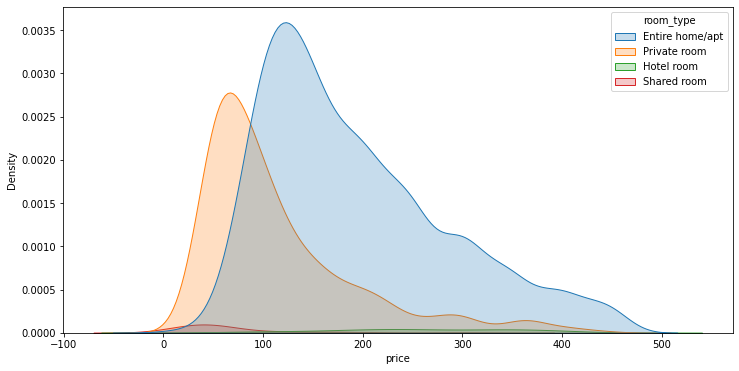

In [24]:
# gr√°fico de deistribui√ß√£o de pre√ßos com diferentes tipos de acomoda√ß√£o
plt.figure(figsize=(12,6))
sns.kdeplot(data = df_clean, x='price',
            hue='room_type', fill=True)

### **Q7. Qual a localidade mais cara do dataset?**



In [25]:
#DISTRIBUI√á√ÉO DE PRE√áOS POR BAIRRO
fig = px.box(df_clean, y="price", x='neighbourhood')
fig.show()

In [39]:
# SCATTER DE CASAS COM COR POR PRE√áO
fig = px.scatter_mapbox(df_clean, lat="latitude", lon="longitude", hover_name="neighbourhood", hover_data=["price"], color = df_clean.price,
                        color_continuous_scale= 'Bluered_r', zoom=3, height=300, title='Mapa de distribui√ß√£o dos im√≥veis em San Francisco')
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 11.5, #Zoom in scale
    mapbox_center = {"lat": df_clean['latitude'].mean(), "lon": df_clean['longitude'].mean()}, #Center location of the map
width=1200, height=800)
fig.show()

In [27]:
# CRIAR DATAFRAME COM COUNT DE APARTMENTS POR NEIGHBOURHOOD
hood_series_count = df_clean.groupby('neighbourhood').price.count().sort_values(ascending=True)
hood_count = pd.DataFrame(data = hood_series_count,
                          columns = ['price'])
hood_count.reset_index(inplace=True)
hood_count.columns = ['neighbourhood', 'locations']

#criar dataframe com pre√ßo m√©dio por bairro (CUDIAR POIS AMOSTRA PODE N√ÉO SER REPRESENTATIVA)
avg_hood_df = pd.DataFrame(data = avg_hood,
                           columns = ['price'])
avg_hood_df.reset_index(inplace=True)
avg_hood_df.columns = ['neighbourhood', 'price']

avg_hood_df

neighbourhood       price
0      Financial District  215.571429
1                Presidio  214.400000
2               Glen Park  209.272727
3              Twin Peaks  208.480000
4             North Beach  201.920000
5            Potrero Hill  201.662791
6                  Marina  196.422680
7     Castro/Upper Market  195.653409
8               Chinatown  193.859649
9         Diamond Heights  188.166667
10       Presidio Heights  187.785714
11                Mission  181.178683
12  Downtown/Civic Center  177.795918
13             Noe Valley  175.771812
14               Nob Hill  173.387500
15         Bernal Heights  173.366667
16        Pacific Heights  172.639535
17         Haight Ashbury  170.593333
18        South of Market  169.457399
19     West of Twin Peaks  168.851064
20       Western Addition  165.735915
21         Inner Richmond  161.915789
22           Russian Hill  159.402597
23               Parkside  147.941176
24           Inner Sunset  134.024691
25          Outer Mission  129.848485
26         Outer Richmond  125.567568
27      Visitacion Valley  120.041667
28              Lakeshore  116.545455
29              Excelsior  116.378788
30           Outer Sunset  106.819672
31             Ocean View  104.509091
32                Bayview   99.785124
33         Crocker Amazon   79.391304
34               Seacliff   52.500000

In [41]:
# PRE√áO M√âDIO POR BAIRRO EM MAPA: onde est√£o os pontos tur√≠sticos?
fig = px.choropleth_mapbox(avg_hood_df, geojson=geo, color = 'price',
                           locations='neighbourhood', color_continuous_scale="Viridis",
                           range_color=(0, 220), featureidkey = "properties.neighbourhood",
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat":  37.7749, "lon": -122.4194},
                           opacity = 0.6, title='Mapa de pre√ßos m√©dios por bairro de San Francisco (US$)'
                          )
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 11.5, #Zoom in scale
    mapbox_center = {"lat": 37.7749, "lon": -122.4194}, #Center location of the map
width=1200, height=800)
fig.show()

Percebe-se que h√° uma tend√™ncia de que √°reas mais tur√≠sticas tenham pre√ßos de pernoite mais elevados. Essa correla√ß√£o pode n√£o ser causalidade direta e oturos fatores podem influenciar na an√°lise.

O pr√≥prio dataset utilizado pode conter vi√©ses, visto que o n√∫mero de acomoda√ß√µes em certos bairros √© pequeno o que indica um vi√©s de amostragem. Com um dataset maior, seria poss√≠vel obter mais an√°lises.

Abaixo, percebe-se que o bairo **Presidio** (um dos bairros mais caros do mapa acima, e muito pr√≥ximo da famosa Golden Gate) possui somente 5 acomoda√ß√µes, levando a um pre√ßo m√©dio enviesado. Assim como o bairro **Seacliff**, que cont√©m somente 2 acomoda√ß√µes neste dataset.

In [29]:
hood_count

neighbourhood  locations
0                Seacliff          2
1                Presidio          5
2         Diamond Heights          6
3               Lakeshore         11
4        Presidio Heights         14
5          Crocker Amazon         23
6       Visitacion Valley         24
7              Twin Peaks         25
8               Glen Park         33
9                Parkside         34
10         Outer Richmond         37
11     West of Twin Peaks         47
12             Ocean View         55
13              Chinatown         57
14           Outer Sunset         61
15              Excelsior         66
16          Outer Mission         66
17     Financial District         70
18            North Beach         75
19           Russian Hill         77
20           Inner Sunset         81
21        Pacific Heights         86
22           Potrero Hill         86
23         Inner Richmond         95
24                 Marina         97
25                Bayview        121
26             Noe Valley        149
27         Haight Ashbury        150
28               Nob Hill        160
29    Castro/Upper Market        176
30         Bernal Heights        180
31        South of Market        223
32  Downtown/Civic Center        245
33       Western Addition        284
34                Mission        319

### **Q8. Qual √© a m√©dia do m√≠nimo de noites para aluguel (minimum_nights)?**

Somente a m√©dia pode n√£o representar bem a amostragem, portanto, vamos analisar a distribui√ß√£o desta vari√°vel no dataset.

In [30]:
df_clean.minimum_nights.describe()

count    3240.000000
mean       21.835802
std        13.869954
min         1.000000
25%         3.000000
50%        30.000000
75%        30.000000
max        70.000000
Name: minimum_nights, dtype: float64

Text(0.5, 1.0, 'Distribui√ß√£o de m√≠nimo de noites em San Francisco')

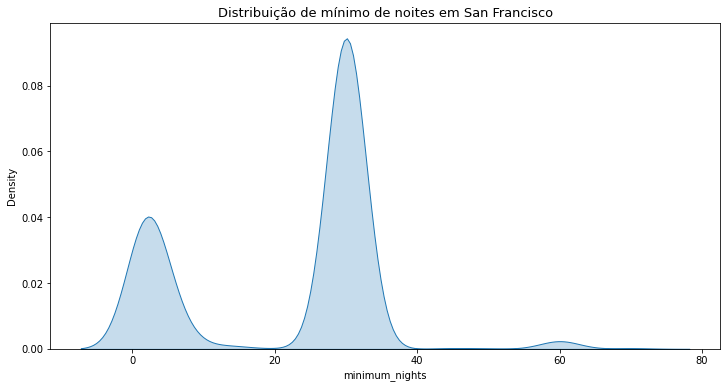

In [31]:
# distribui√ß√£o de n√∫mero m√≠nimo de noites em san francisco
plt.figure(figsize=(12,6))
ax = sns.kdeplot(data=df_clean, x='minimum_nights', fill=True)
ax.set_title('Distribui√ß√£o de m√≠nimo de noites em San Francisco', fontsize=13)

No gr√°fico de distribui√ß√£o acima, podemos perceber 2 picos principais:
* O maior est√° pr√≥ximo de 30, o que indica que a maioria das acomoda√ß√µes de San Francisco exigem estadia m√≠nima de 30 dias - estadia mensal.
* O segundo maior pico est√° pr√≥ximo de 1, o que indica que estas acomoda√ß√µes permitem tempo de acomoda√ß√£o di√°rio ou muito pr√≥ximo disto.
* Um terceiro pico pode ser citado (por√©m n√£o t√£o relevante quanto os outros dois), que est√° pr√≥ximo de 60. Isto indica que estas acomoda√ß√µes exigem estadia m√≠nimo de 2 meses.

### **PLOT TWIST**: Airbnb's no bairro do Headquarter do Airbnb!

In [32]:
soma = df_clean[df_clean['neighbourhood']=='South of Market']
soma.head()

id  ... number_of_reviews_ltm
109  209420  ...                     0
129  271602  ...                     5
146  329020  ...                     0
216  616517  ...                     4
217  626349  ...                     6

[5 rows x 14 columns]

In [33]:
soma[['price', 'minimum_nights']].describe()

price  minimum_nights
count  223.000000      223.000000
mean   169.457399       25.910314
std     80.490538       12.073761
min     33.000000        1.000000
25%    110.000000       30.000000
50%    150.000000       30.000000
75%    212.000000       30.000000
max    449.000000       70.000000

In [34]:
soma['room_type'].value_counts()/soma['room_type'].count()

Entire home/apt    0.726457
Private room       0.233184
Hotel room         0.022422
Shared room        0.017937
Name: room_type, dtype: float64

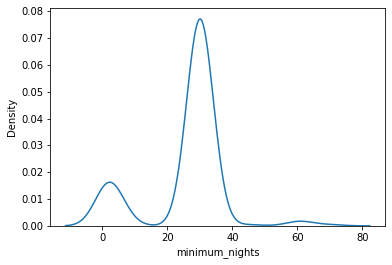

In [35]:
sns.kdeplot(soma['minimum_nights'])

## Conclus√µes


Algumas conclus√µes simples desta an√°lise explorat√≥ria de dados foram:

1.   H√° baixa ou nula correla√ß√£o linear entre as vari√°veis.
2.   Bairros com pre√ßo m√©dio mais caros normalmente cont√™m algum ponto tur√≠stico not√°vel e est√£o localizados em √°reas mais centrais da cidade, como *Financial District*.
3.   O bairro *Mission* √© o que cont√©m maior n√∫mero de acomoda√ß√µes na cidade.
4.   Mais de 60% das acomoda√ß√µes  de SF s√£o do tipo *Entire home/apt*.
5.   A maioria das acomoda√ß√µes exige estadia m√≠nima pr√≥xima de 30 dias.



<img alt="lucca_assinatura" width="60%" src="https://raw.githubusercontent.com/lucca-miorelli/ds_projects/main/lucca_github.png">

[Github](https://github.com/lucca-miorelli/ds_projects), [Linkedin](https://www.linkedin.com/in/lucca-miorelli/)